In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:/Users/ubaid khan/Desktop/ML & DS/PROJECT/University Admission Probability/Admission_Predict.csv")

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [13]:
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

<AxesSubplot:xlabel='Research', ylabel='count'>

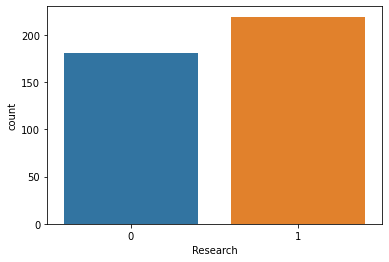

In [17]:
sns.countplot(x='Research', data=df)

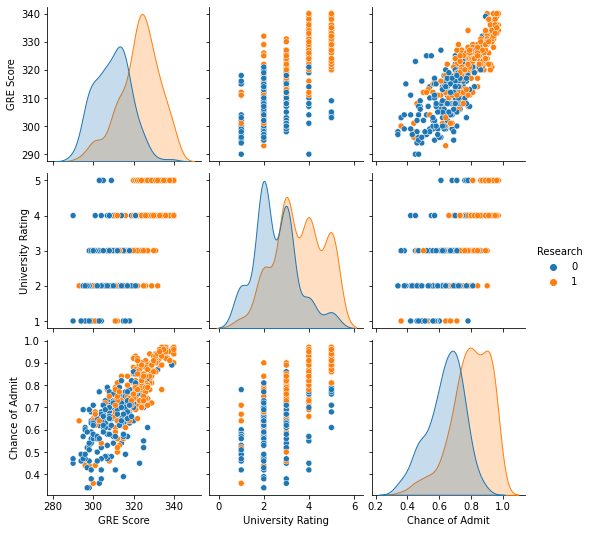

In [24]:
sns.pairplot(df[['GRE Score','University Rating','Chance of Admit','Research']],hue='Research')

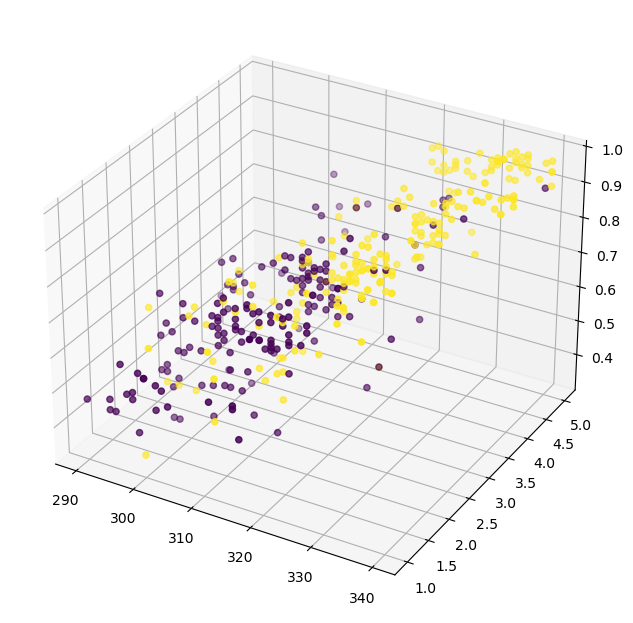

In [32]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,8), dpi=100)
ax = fig.add_subplot(111, projection='3d')
colors = df['Research']
ax.scatter(df['GRE Score'],df['University Rating'],df['Chance of Admit'],c=colors);

----
----

# Machine Learning

## Train | Test Split and Scaling

**Separating the features from the labels into 2 objects, X and y.**

In [34]:
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

**Performing a train test split on the data, with the test size of 10% and a random_state of 101.**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Creating a StandardScaler object and normalizing the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [38]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model

In [46]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

base_elastic_model = ElasticNet()

param_grid = {'alpha':[.0091, .0099, .01, .02, .03, .04, .05, .06, .07, .08, .09, .1, .2, .3, .4, .5, .7, .9,1,5,10,50,100],
              'l1_ratio':[0.0075, 0.0085, .0091, .0099, .01, .02, .03, .04, .05, .06, .07, .08, .09, .1, .2, .3, .4, .5, .7, .9, .95, .99, 1]}

# verbose number a personal preference
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5)

grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0091, 0.0099, 0.01, 0.02, 0.03, 0.04, 0.05,
                                   0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.7, 0.9, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.0075, 0.0085, 0.0091, 0.0099, 0.01,
                                      0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,
                                      0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9,
                                      0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [47]:
grid_model.best_estimator_

ElasticNet(alpha=0.06, l1_ratio=0.0075)

### Using Best Model From Grid Search

In [50]:
y_pred = grid_model.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error

In [44]:
mean_squared_error(y_test,y_pred) #Try-2 (Tuned the hyperparameters)

0.0044662468952861595

In [52]:
mean_squared_error(y_test,y_pred) #Try-3 (Tuned the hyperparameters)

0.004464311897236094

### Final Testing (with new data)

In [102]:
testing = df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
testing = df.drop('Serial No.',axis=1)

In [103]:
## CREATE X and y
X = testing.drop('Chance of Admit', axis=1)
y = testing['Chance of Admit']

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [104]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

base_elastic_model = ElasticNet()

param_grid = {'alpha':[.0091, .0099, .01, .02, .03, .04, .05, .06, .07, .08, .09, .1, .2, .3, .4, .5, .7, .9,1,5,10,50,100],
              'l1_ratio':[0.0075, 0.0085, .0091, .0099, .01, .02, .03, .04, .05, .06, .07, .08, .09, .1, .2, .3, .4, .5, .7, .9, .95, .99, 1]}

# verbose number a personal preference
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5)

grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0091, 0.0099, 0.01, 0.02, 0.03, 0.04, 0.05,
                                   0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.7, 0.9, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.0075, 0.0085, 0.0091, 0.0099, 0.01,
                                      0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,
                                      0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9,
                                      0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [105]:
grid_model.fit(X,y)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0091, 0.0099, 0.01, 0.02, 0.03, 0.04, 0.05,
                                   0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.7, 0.9, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.0075, 0.0085, 0.0091, 0.0099, 0.01,
                                      0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,
                                      0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9,
                                      0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [115]:
X[0]

array([1.76210664, 1.74697064, 0.79882862, 1.09386422, 1.16732114,
       1.76481828, 0.90911166])

In [116]:
X

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [106]:
y_test_pred = grid_model.predict(X)

In [107]:
y_test_pred

array([0.94883223, 0.804215  , 0.65547895, 0.73961074, 0.63426177,
       0.86596457, 0.71226211, 0.60291868, 0.54927934, 0.71479915,
       0.73374554, 0.83607963, 0.85223051, 0.64324414, 0.63816116,
       0.64510149, 0.71251935, 0.65628085, 0.73444406, 0.64985938,
       0.6142625 , 0.69718455, 0.92514975, 0.95717463, 0.95145413,
       0.95945443, 0.75948977, 0.52238755, 0.42938979, 0.49044087,
       0.60224823, 0.71724519, 0.92200075, 0.93173665, 0.95339398,
       0.85899576, 0.65835937, 0.54180844, 0.50427711, 0.58801099,
       0.64793918, 0.65533305, 0.67965376, 0.84027821, 0.88062434,
       0.83036358, 0.89827236, 0.93259587, 0.81040458, 0.75694828,
       0.6878932 , 0.62009103, 0.71742375, 0.68885443, 0.66042609,
       0.59183762, 0.54735069, 0.50311094, 0.43315159, 0.621242  ,
       0.60395899, 0.61983743, 0.64403188, 0.70406258, 0.74892828,
       0.78216997, 0.78746768, 0.73230517, 0.82368735, 0.85736847,
       0.95419425, 0.95785226, 0.8923304 , 0.79809935, 0.76870

In [108]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_test_pred) 

0.003992937301750846

In [109]:
difference = y - y_test_pred

<AxesSubplot:xlabel='Chance of Admit', ylabel='Chance of Admit'>

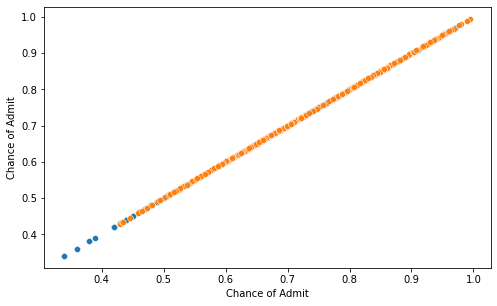

In [110]:
plt.figure(figsize=(8,4.8))
sns.scatterplot(x=y, y=y, data=testing,)
sns.scatterplot(x=y_test_pred, y=y_test_pred, data=testing)

# Thank You!

In [111]:
from joblib import dump, load

In [112]:
dump(grid_model, 'university_admission.joblib') 

['university_admission.joblib']

In [113]:
loaded_model = load('university_admission.joblib')

In [120]:
loaded_model.predict(trial)

array([9.41409743])

In [ ]:
gre,tofel,sepal_length, sepal_width, petal_length, petal_width,research

In [87]:
trial = [[300,100,4,4,4,9,1]]

In [117]:
trial2 = [[1.76210664, 1.74697064, 0.79882862, 1.09386422, 1.16732114,
       1.76481828, 0.90911166]]

In [133]:
pre='[0.724354444]'

In [138]:
float(pre[1:5])

0.72